/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:00<00:00, 216MB/s]


Epoch 1/20 - Train Acc: 0.9888, Val Acc: 0.9994
Epoch 2/20 - Train Acc: 0.9965, Val Acc: 0.9684
Epoch 3/20 - Train Acc: 0.9967, Val Acc: 0.9998
Epoch 4/20 - Train Acc: 0.9980, Val Acc: 0.9986
Epoch 5/20 - Train Acc: 0.9981, Val Acc: 0.9998
Epoch 6/20 - Train Acc: 0.9982, Val Acc: 0.9992
Epoch 7/20 - Train Acc: 0.9982, Val Acc: 0.9997
Epoch 8/20 - Train Acc: 0.9987, Val Acc: 0.9998
Epoch 9/20 - Train Acc: 0.9985, Val Acc: 0.9998
Epoch 10/20 - Train Acc: 0.9991, Val Acc: 0.9998
Epoch 11/20 - Train Acc: 0.9988, Val Acc: 0.9997
Epoch 12/20 - Train Acc: 0.9986, Val Acc: 0.9998
Epoch 13/20 - Train Acc: 0.9993, Val Acc: 0.9998
Epoch 14/20 - Train Acc: 0.9986, Val Acc: 1.0000
Epoch 15/20 - Train Acc: 0.9998, Val Acc: 0.9998
Epoch 16/20 - Train Acc: 0.9990, Val Acc: 0.9997
Epoch 17/20 - Train Acc: 0.9990, Val Acc: 0.9998
Epoch 18/20 - Train Acc: 0.9991, Val Acc: 0.9988
Epoch 19/20 - Train Acc: 0.9993, Val Acc: 0.9999
Epoch 20/20 - Train Acc: 0.9992, Val Acc: 0.9991


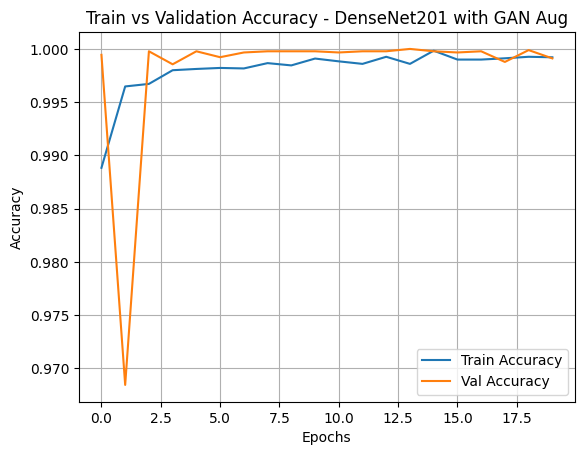

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset directories
train_dir = '/kaggle/input/ganmango224x224/GANDataset224X224/train'
val_dir = '/kaggle/input/ganmango224x224/GANDataset224X224/val'
test_dir = '/kaggle/input/ganmango224x224/GANDataset224X224/test'

# Hyperparameters
NUM_CLASSES = 6
BATCH_SIZE = 16
NUM_EPOCHS = 20
LR = 1e-4

# Transforms (no augmentation)
base_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=base_transform)
val_dataset = datasets.ImageFolder(val_dir, transform=base_transform)
test_dataset = datasets.ImageFolder(test_dir, transform=base_transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Load DenseNet-201 model
model = models.densenet201(pretrained=True)
model.classifier = nn.Sequential(
    nn.Linear(model.classifier.in_features, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, NUM_CLASSES)
)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

# Training function
def train_model():
    history = {'train_acc': [], 'val_acc': []}
    for epoch in range(NUM_EPOCHS):
        model.train()
        running_corrects = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_corrects += torch.sum(preds == labels.data)

        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        history['train_acc'].append(epoch_acc.item())

        # Validation
        model.eval()
        val_corrects = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_acc = val_corrects.double() / len(val_loader.dataset)
        history['val_acc'].append(val_acc.item())
        print(f"Epoch {epoch+1}/{NUM_EPOCHS} - Train Acc: {epoch_acc:.4f}, Val Acc: {val_acc:.4f}")
    return history

# Train model
history = train_model()

# Plot accuracy
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Val Accuracy')
plt.title('Train vs Validation Accuracy - DenseNet201 with GAN Aug')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()





✅ Test Accuracy: 0.9998

Classification Report DenseNet201 with GAN Aug:
                    precision    recall  f1-score   support

       ANTHRECNOSE       1.00      1.00      1.00      1500
           DIEBACK       1.00      1.00      1.00      1500
  GALLMILDGEDAMAGE       1.00      1.00      1.00      1500
           HEALTHY       1.00      1.00      1.00      1500
INSECTDAMAGEWEBBER       1.00      1.00      1.00      1500
        LEAFBLIGHT       1.00      1.00      1.00      1500

          accuracy                           1.00      9000
         macro avg       1.00      1.00      1.00      9000
      weighted avg       1.00      1.00      1.00      9000



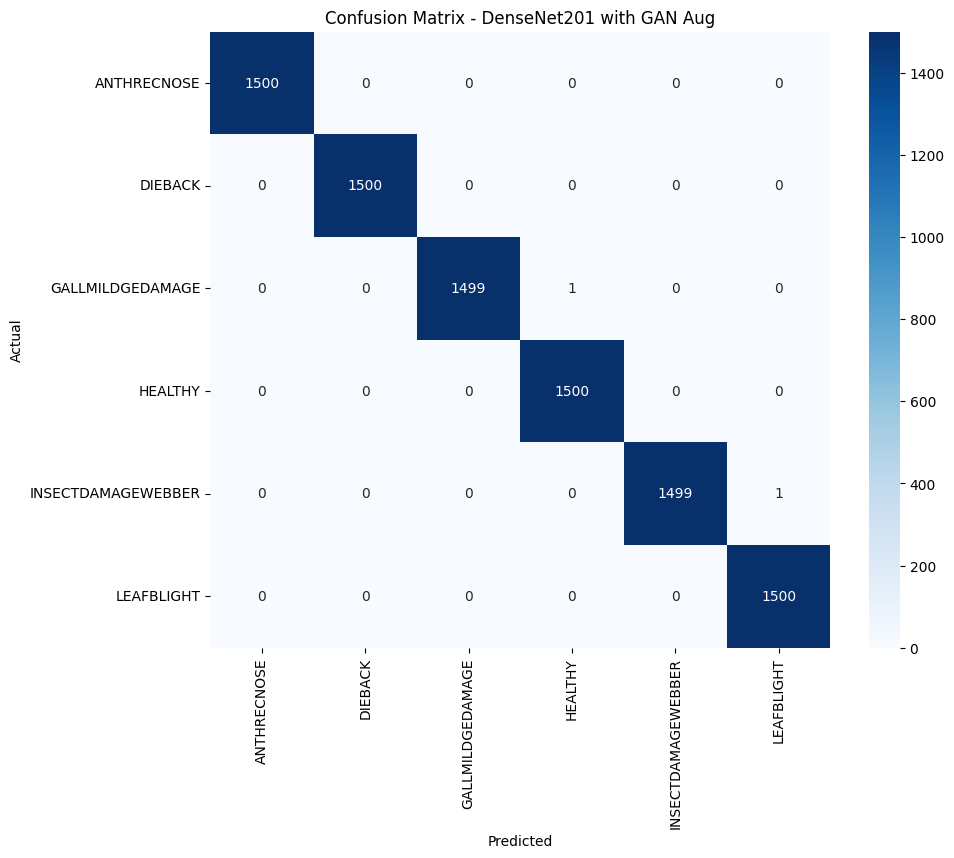

In [2]:
# Evaluate on test set
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds.cpu().numpy())

# Test accuracy
test_accuracy = np.mean(np.array(y_true) == np.array(y_pred))
print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")

# Classification report
class_names = test_dataset.classes
print("\nClassification Report DenseNet201 with GAN Aug:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.title("Confusion Matrix - DenseNet201 with GAN Aug")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()